<a href="https://colab.research.google.com/github/Cru1zzz3/python-parallel-programming-cookbook/blob/main/Python_Parallel_Programming_(Lab_2)_Udartsev_Stanislav.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**How to define a thread**

Использование потока вызывается с помощью класса Thread библиотеки Threading

In [ ]:
import threading

In [ ]:
def function(i):
  print("function called by thread %i\n" %i)
  return

In [ ]:
threads = []
for i in range(5):
  t = threading.Thread(target=function, args=(i,))
  threads.append(t)
  t.start()
  t.join()

function called by thread 0

function called by thread 1

function called by thread 2

function called by thread 3

function called by thread 4



**How to determine the current thread**

Для определения текущего потока выполнения можно обращаться к потоку используя методы .currentThread().getName() 

In [ ]:
import threading
import time

def first_function():
  print(threading.currentThread().getName()+ str(' is Starting \n'))
  time.sleep(2)
  print(threading.currentThread().getName() + str(' is Exiting \n'))
  return

def second_function():
  print(threading.currentThread().getName() + str(' is Starting \n'))
  time.sleep(2)
  print(threading.currentThread().getName() + str(' is Exiting \n'))
  return

def third_function():
  print(threading.currentThread().getName() + str('is Staring \n'))
  time.sleep(2)
  print(threading.currentThread().getName() + str('is Exiting \n'))
  return

t1 = threading.Thread(name='first_function', target=first_function)
t2 = threading.Thread(name='second_function', target=second_function)
t3 = threading.Thread(name='third_function', target=third_function)

t1.start()
t2.start()
t3.start()

# Т.к в коллабе при завершении основного потока закрываются остальные потоки не дожидаясь завершения,
# то добавим ожидание остальныех потоков с помощью метода .join(), чтобы получить ожидаемый вывод
t1.join() 
t2.join()
t3.join()

first_function is Starting 

second_function is Starting 

third_functionis Staring 

second_function is Exiting 

third_functionis Exiting 

first_function is Exiting 



**How to use a thread in a subclass**

Применяя наследование от класса Thread можно добиться использования функционала потоков при реализации собственного класса 

In [ ]:
import threading
import time

exitFlag = 0

class myThread (threading.Thread):
  def __init__(self, threadID, name, counter):
    threading.Thread.__init__(self)
    self.threadID = threadID
    self.name = name
    self.counter = counter

  def run(self):
    print("Starting " + self.name)
    print_time(self.name, self.counter, 5)
    print ("Exiting " + self.name)

In [ ]:
def print_time(threadName, delay, counter):
  while counter:
    if exitFlag: 
      thread.exit()
    time.sleep(delay)
    print("%s: %s" %(threadName, time.ctime(time.time())))
    counter -= 1

In [ ]:
thread1 = myThread(1, "Thread-1", 1)
thread2 = myThread(2, "Thread-2", 2)

thread1.start()
thread2.start()

thread1.join()
thread2.join()
print("Exiting Main Thread")

Starting Thread-1
Starting Thread-2
Thread-1: Mon Nov 15 18:55:24 2021
Thread-1: Mon Nov 15 18:55:25 2021
Thread-2: Mon Nov 15 18:55:25 2021
Thread-1: Mon Nov 15 18:55:26 2021
Thread-1: Mon Nov 15 18:55:27 2021
Thread-2: Mon Nov 15 18:55:27 2021
Thread-1: Mon Nov 15 18:55:28 2021
Exiting Thread-1
Thread-2: Mon Nov 15 18:55:29 2021
Thread-2: Mon Nov 15 18:55:31 2021
Thread-2: Mon Nov 15 18:55:33 2021
Exiting Thread-2
Exiting Main Thread


**Thread synchronization with Lock and
RLock**

Простейшим примитивом синхронизации в Python является Lock(), который позволяет заблокировать необходимый ресурс с помощью метода .acquire() для проведения над ним различных операций, а после этого освободить ресурс c помощью метода .release() 

In [14]:
import threading

shared_resource_with_lock = 0
shared_resource_with_no_lock = 0
# количество итераций увеличено, по сравнению с ориганиалом кода в учебнике, поскольку при малом количестве итераций
# периодически выдавался одинаковый результат при наличии и отсутствии блокировок примитива синхронизации.
COUNT = 300000
shared_resource_lock = threading.Lock()

In [9]:
def increment_with_lock():
    global shared_resource_with_lock
    for i in range(COUNT):
        shared_resource_lock.acquire()
        shared_resource_with_lock += 1
        shared_resource_lock.release()

In [10]:
def decrement_with_lock():
    global shared_resource_with_lock
    for i in range(COUNT):
        shared_resource_lock.acquire()
        shared_resource_with_lock -= 1
        shared_resource_lock.release()

In [11]:
def increment_without_lock():
    global shared_resource_with_no_lock
    for i in range(COUNT):
        shared_resource_with_no_lock += 1


In [12]:
def decrement_without_lock():
    global shared_resource_with_no_lock
    for i in range(COUNT):
        shared_resource_with_no_lock -= 1

In [18]:
t1 = threading.Thread(target=increment_with_lock)
t2 = threading.Thread(target=decrement_with_lock)
t3 = threading.Thread(target=increment_without_lock)
t4 = threading.Thread(target=decrement_without_lock)

t1.start()
t2.start()
t3.start()
t4.start()

t1.join()
t2.join()
t3.join()
t4.join()

print("the value of shared variable with lock management is", shared_resource_with_lock)
print("the value of shared variable with race condition is", shared_resource_with_no_lock)

the value of shared variable with lock management is 0
the value of shared variable with race condition is -127867


**Thread synchronization with RLock**

Главное отличие от Lock() заключается в том, что с помощью Lock() можно захватить ресурс только один раз. Его нельзя захватить снова, пока он не будет освобожден. (После того, как он был освобожден, он может быть повторно захвачен любым потоком).

С другой стороны, RLock может быть захвачен несколько раз одним и тем же потоком. Чтобы разблокировать Rlock(), его нужно освободить одинаковое количество раз.

Ещё одно отличие состоит в том, что ресурс захваченный Lock() может быть освобожден любым потоком, в то время как ресурс захваченный RLock() может быть освобожден только тем потоком, который ее захватил.

In [32]:
import threading
import time

In [37]:
class Box(object):
  lock = threading.RLock()
  def __init__(self):
    self.total_items = 0

  def execute (self,n):
    Box.lock.acquire()
    self.total_items += n
    Box.lock.release()
  
  def add(self):
    Box.lock.acquire()
    self.execute(1)
    Box.lock.release()

  def remove(self):
    Box.lock.acquire()
    self.execute(-1)
    Box.lock.release()

In [38]:
def adder(box, items):
  while items > 0:
    print ("adding 1 item in the box\n")
    box.add()
    time.sleep(5)
    items -= 1

In [39]:
def remover(box, items):
  while items > 0:
    print("removing 1 item in the box")
    box.remove()
    time.sleep(5)
    items -= 1

In [40]:
items = 5
print("putting %s items in the box " % items)
box = Box()
t1 = threading.Thread(target=adder, args=(box,items))
t2 = threading.Thread(target=remover,args=(box,items))
t1.start()
t2.start()

t1.join()
t2.join()
print("%s items still remain in the box " % box.total_items)

putting 5 items in the box 
adding 1 item in the box

removing 1 item in the box
adding 1 item in the box

removing 1 item in the box
adding 1 item in the box

removing 1 item in the box
adding 1 item in the box

removing 1 item in the box
adding 1 item in the box

removing 1 item in the box
0 items still remain in the box 


**Thread synchronization with semaphores**

Семафоры похож на предыдущие механизмы синхронизации, но в своей основе лежит счетчик. Значение соответствующего счетчика уменьшается на каждый вызов .acquire() (но не может быть уменьшен ниже нуля) и увеличивается на каждый вызов release(). Таким образом, нельзя будет уменьшить счётчик ниже нуля и получить ресурс, до тех пор, пока счётчик не будет увеличен и ресурс не будет освобождён. 

In [16]:
import threading
import time 
import random

semaphore = threading.Semaphore(0)


In [17]:
def producer():
  global item
  time.sleep(10)
  item = random.randint(0,1000)
  print("Producer notify : produced item number %s" %item)
  semaphore.release() # происходит увеличение значение семафора на 1

In [18]:
def consumer():
  print("consumer is waiting.")
  semaphore.acquire() # поток блокируется до тех пор, пока счётчик не будет увеличен 
  print("Consumer notify : consumed item number %s" %item)

In [20]:
for i in range(0,5):
  t1 = threading.Thread(target=producer)
  t2 = threading.Thread(target=consumer)
  t1.start()
  t2.start()
  t1.join()
  t2.join()
print("program terminated")

consumer is waiting.
Producer notify : produced item number 919
Consumer notify : consumed item number 919
consumer is waiting.
Producer notify : produced item number 29
Consumer notify : consumed item number 29
consumer is waiting.
Producer notify : produced item number 594
Consumer notify : consumed item number 594
consumer is waiting.
Producer notify : produced item number 111
Consumer notify : consumed item number 111
consumer is waiting.
Producer notify : produced item number 135
Consumer notify : consumed item number 135
program terminated


**Thread synchronization with a condition**

Примитив синхронизации Condition позволяет позволяет потоку ожидать, до наступления определённого условия с помощью метода .wait(). После того, как определённое условие соблюдено, используется метод .notify() для того, чтобы оповестить ожидающий поток и пробудить его из режима ожидания. 

In [1]:
from threading import Thread, Condition
import time

items = []
condition = Condition()

class consumer(Thread):
  def __init(self):
    Thread.__init__(self)

  def consume(self):
    global condition
    global items

    condition.acquire()
    if len(items) == 0:
      condition.wait()
      print("Consumer notify: no item to consume")
    items.pop()
    print("Consumer notify: consumed 1 item")
    print("Consumer notify: items to consume are " + str(len(items)))
    condition.notify()
    condition.release()

  def run(self):
    for i in range(0,20):
      time.sleep(10)
      self.consume()

class producer(Thread):
  def __init__(self):
    Thread.__init__(self)

  def produce(self):
    global condition
    global items

    condition.acquire()
    if len(items) == 10:
      condition.wait()
      print("Producer notify: items producted are " + str(len(items)))
      print("Producer notify: stop the production!!")
    items.append(1)
    print("Producer notify: total items producted " + str(len(items)))
    condition.notify()
    condition.release()

  def run(self):
    for i in range(0,20):
      time.sleep(5)
      self.produce() 

producer = producer()
consumer = consumer()

producer.start()
consumer.start()

producer.join()
consumer.join()




Producer notify: total items producted 1
Consumer notify: consumed 1 item
Consumer notify: items to consume are 0
Producer notify: total items producted 1
Producer notify: total items producted 2
Consumer notify: consumed 1 item
Consumer notify: items to consume are 1
Producer notify: total items producted 2
Producer notify: total items producted 3
Consumer notify: consumed 1 item
Consumer notify: items to consume are 2
Producer notify: total items producted 3
Producer notify: total items producted 4
Consumer notify: consumed 1 item
Consumer notify: items to consume are 3
Producer notify: total items producted 4
Producer notify: total items producted 5
Consumer notify: consumed 1 item
Consumer notify: items to consume are 4
Producer notify: total items producted 5
Producer notify: total items producted 6
Consumer notify: consumed 1 item
Consumer notify: items to consume are 5
Producer notify: total items producted 6
Producer notify: total items producted 7
Consumer notify: consumed 1 i

**Thread synchronization with an event**

Примитив синхронизации Event работает схожим образом. Он использует внутренний флаг set(), который потоки могут устанавливать set или флаг clear(), который могут сбрасывать.  Другие потоки могут ожидать установки внутреннего флага с помощью метода wait().  Метод  wait()  блокирует поток, до тех пор, пока флаг не станет истинным.

В примере из книги класс Consumer работал бескончено из-за условия цикла while true. В пример было добавлено условие выхода из цикла. 

При добавлении условия выхода нужно быть осторожным, потому что если поток с классом Producer закончит свою работу раньше потока с классом  Consumer, то поток содержащий Consumer будет бесконечно ожидать события, т.к. он находится в состоянии event.wait(), согласно схеме представленной на рисунке:

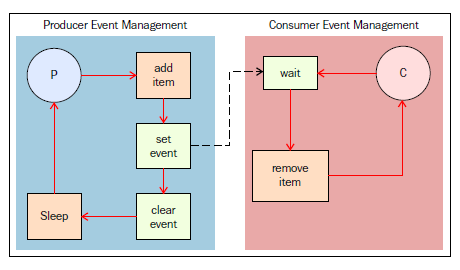

In [16]:
import time
from threading import Thread, Event
import random

items = []
event = Event()

popBound = 4

class consumer(Thread):
  def __init__(self,items,event):
    Thread.__init__(self)
    self.items = items
    self.event = event

  def run(self):
    popCount = 0
    for i in range(popBound):
      time.sleep(1)
      self.event.wait()
      item = self.items.pop()
      popCount += 1 
      print ('\nconsumer notify: %d popped from listby %s\n' %(item, self.name))
      if popCount == popBound:
        break

class producer(Thread):
  def __init__(self, integers, event):
    Thread.__init__(self)
    self.items = items
    self.event = event

  def run(self):
    global item
    for i in range(popBound):
      time.sleep(2)
      item = random.randint(0,256)
      self.items.append(item)
      print ('Producer notify: item N° %d appended to list by %s' % (item, self.name))
      print ('Producer notify: event set by %s' % self.name)
      self.event.set()
      print ('Produce notify: event cleared by %s \n' % self.name)
      self.event.clear()

t1 = producer(items,event)
t2 = consumer(items,event)

t1.start()
t2.start()

t1.join()
t2.join()



Producer notify: item N° 9 appended to list by Thread-41
Producer notify: event set by Thread-41
Produce notify: event cleared by Thread-41 


consumer notify: 9 popped from listby Thread-42

Producer notify: item N° 137 appended to list by Thread-41
Producer notify: event set by Thread-41
Produce notify: event cleared by Thread-41 


consumer notify: 137 popped from listby Thread-42

Producer notify: item N° 134 appended to list by Thread-41
Producer notify: event set by Thread-41
Produce notify: event cleared by Thread-41 


consumer notify: 134 popped from listby Thread-42

Producer notify: item N° 61 appended to list by Thread-41
Producer notify: event set by Thread-41
Produce notify: event cleared by Thread-41 


consumer notify: 61 popped from listby Thread-42



**Using the with statement**

Использование выражение with позволяет упростить работу с примитивами синхронизации. Вместо того, чтобы напрямую указывать захват и освобождение ресурса через конструкцию try: .. finally: и методы .acquire() и .release(), использование выражения with берёт всю работу на себя.

In [19]:
import threading
import logging

logging.basicConfig(level=logging.DEBUG, format='(%(threadName)-10s) %(message)s',)

def threading_with(statement):
  with statement: 
    logging.debug('%s acquired via with' %statement)

def threading_not_with(statement):
  statement.acquire()
  try:
    logging.debug('%s acquired directly' %statement)
  finally:
    statement.release()


lock = threading.Lock()
rlock = threading.RLock()
condition = threading.Condition()
mutex = threading.Semaphore(1)
threading_synchronization_list = [lock, rlock, condition, mutex]

for statement in threading_synchronization_list: 
  t1 = threading.Thread(target=threading_with, args=(statement,))
  t2 = threading.Thread(target=threading_not_with, args=(statement,))

  t1.start()
  t2.start()

  t1.join()
  t2.join()  

(Thread-43 ) <locked _thread.lock object at 0x7f94f2c9f0c0> acquired via with
(Thread-44 ) <locked _thread.lock object at 0x7f94f2c9f0c0> acquired directly
(Thread-45 ) <locked _thread.RLock object owner=140277585245952 count=1 at 0x7f94f2c9f900> acquired via with
(Thread-46 ) <locked _thread.RLock object owner=140277696628480 count=1 at 0x7f94f2c9f900> acquired directly
(Thread-47 ) <Condition(<locked _thread.RLock object owner=140277696628480 count=1 at 0x7f94f2c9f990>, 0)> acquired via with
(Thread-48 ) <Condition(<locked _thread.RLock object owner=140277585245952 count=1 at 0x7f94f2c9f990>, 0)> acquired directly
(Thread-49 ) <threading.Semaphore object at 0x7f94f1428f90> acquired via with
(Thread-50 ) <threading.Semaphore object at 0x7f94f1428f90> acquired directly


**Thread communication using a queue**

Примитив синхронизации Queue позволяет получить доступ к общим ресурсам, добавля их в общую очередь с помощью метода .put(), а затем получать их из общей очереди с помощью последовательных вызовов методов .get() и .task_done().

В примере из книги класс Consumer работал бескончено из-за условия цикла while true. В пример было добавлено условие выхода из цикла.

Условие выхода было таковым, что если очередь пуста, то потоки с классом Consumer должны завершить свою работу. Путём добавления в классе Consumer паузы, класс Producer мог добавить несколько значений в очередь, после чего эти значения могли быть взяты из очереди классом Consumer. После того, как очередь становится пустой, потоки Consumer завершают свою работу. 

In [12]:
from threading import Thread, Event
from queue import Queue
import time
import random

class producer(Thread): 
  def __init__(self, queue):
    Thread.__init__(self)
    self.queue = queue

  def run(self):
    for i in range(10):
      item = random.randint(0, 256)
      self.queue.put(item)
      print ('Producer notify: item N°%d appended to queue by %s' % (item, self.name))
      print(list(self.queue.queue),"\n")
      time.sleep(1)

class consumer(Thread):
  def __init__(self, queue):
    Thread.__init__(self)
    self.queue = queue

  def run(self):
    while(True):
      time.sleep(5)
      if self.queue.empty():
        print ('Exiting...  %s\n' % (self.name))
        break
      item = self.queue.get()
      print('\nConsumer notify : %d popped from queue by %s' % (item, self.name))
      print(list(self.queue.queue),"\n")
      self.queue.task_done()


queue = Queue()

t1 = producer(queue)
t2 = consumer(queue)
t3 = consumer(queue)
t4 = consumer(queue)


t1.start()
t2.start()
t3.start()
t4.start()

t1.join()
t2.join()
t3.join()
t4.join()

Producer notify: item N°114 appended to queue by Thread-55
[114] 

Producer notify: item N°109 appended to queue by Thread-55
[114, 109] 

Producer notify: item N°118 appended to queue by Thread-55
[114, 109, 118] 

Producer notify: item N°106 appended to queue by Thread-55
[114, 109, 118, 106] 

Producer notify: item N°200 appended to queue by Thread-55
[114, 109, 118, 106, 200] 


Consumer notify : 114 popped from queue by Thread-56
[109, 118, 106, 200] 


Consumer notify : 109 popped from queue by Thread-57
[118, 106, 200] 


Consumer notify : 118 popped from queue by Thread-58
[106, 200] 

Producer notify: item N°59 appended to queue by Thread-55
[106, 200, 59] 

Producer notify: item N°123 appended to queue by Thread-55
[106, 200, 59, 123] 

Producer notify: item N°121 appended to queue by Thread-55
[106, 200, 59, 123, 121] 

Producer notify: item N°174 appended to queue by Thread-55
[106, 200, 59, 123, 121, 174] 

Producer notify: item N°3 appended to queue by Thread-55
[106, 200

**Evaluating the performance of multithread
applications**

In [42]:
from threading import Thread
import sys
from timeit import Timer

class threads_object(Thread):
    def run(self):
      function_to_run()

class nothreads_object(object):
    def run(self):
      function_to_run()

def non_threaded(num_iter):
    funcs = []
    for i in range(int(num_iter)):
      funcs.append(nothreads_object())
    for i in funcs:
      i.run()

def threaded(num_threads):
    funcs = []
    for i in range(int(num_threads)):
      funcs.append(threads_object())
    for i in funcs:
      i.start()
    for i in funcs:
      i.join()

def show_results(func_name, results):
    print('{}-23s {:4.6f} second'.format(func_name, results))

def threads_test():
  for i in num_threads:
    t = Timer("non_threaded({})".format(i), "from __main__ import non_threaded")
    best_result =min(t.repeat(repeat=repeat, number=number))
    show_results("non_threaded ({} iters)".format(i), best_result)
    t = Timer("threaded({})".format(i), "from __main__ import threaded")
    best_result = min(t.repeat(repeat=repeat, number=number))
    show_results("threaded ({} threads)".format(i), best_result) 

  print('Iterations complete \n') 
 

function_to_run = function_to_run
repeat = 100
number = 1
num_threads = [ 1, 2, 4, 8]



In [51]:
# Test 1
def function_to_run():
    pass

threads_test()


non_threaded (1 iters)-23s 0.000001 second
threaded (1 threads)-23s 0.000071 second
non_threaded (2 iters)-23s 0.000001 second
threaded (2 threads)-23s 0.000132 second
non_threaded (4 iters)-23s 0.000002 second
threaded (4 threads)-23s 0.000277 second
non_threaded (8 iters)-23s 0.000005 second
threaded (8 threads)-23s 0.000501 second
Iterations complete 



In [52]:
# Test 2
def function_to_run():
    a, b = 0, 1
    for i in range(10000):
        a, b = b, a + b
        
threads_test()

non_threaded (1 iters)-23s 0.001723 second
threaded (1 threads)-23s 0.001846 second
non_threaded (2 iters)-23s 0.003528 second
threaded (2 threads)-23s 0.003660 second
non_threaded (4 iters)-23s 0.007227 second
threaded (4 threads)-23s 0.007526 second
non_threaded (8 iters)-23s 0.014417 second
threaded (8 threads)-23s 0.015523 second
Iterations complete 



In [53]:
# Test 3

def function_to_run():
    fh=open("./Evgeniy_Onegin.pdf","rb")
    size = 1024
    for i in range(1000):
       fh.read(size)

threads_test()

non_threaded (1 iters)-23s 0.000407 second
threaded (1 threads)-23s 0.000566 second
non_threaded (2 iters)-23s 0.000809 second
threaded (2 threads)-23s 0.001207 second
non_threaded (4 iters)-23s 0.001620 second
threaded (4 threads)-23s 0.002388 second
non_threaded (8 iters)-23s 0.003371 second
threaded (8 threads)-23s 0.010345 second
Iterations complete 



In [62]:
def function_to_run():
    import urllib.request
    for i in range(10):
        with urllib.request.urlopen("https://en.wikipedia.org/wiki/Main_Page")as f:
            f.read(1024)

threads_test()

non_threaded (1 iters)  0.403459 seconds
threaded (1 threads)    0.406172 seconds
non_threaded (2 iters)  0.811953 seconds
threaded (2 threads)    0.409693 seconds
non_threaded (4 iters)  1.634527 seconds
threaded (4 threads)    0.427172 seconds
non_threaded (8 iters)  3.285709 seconds
threaded (8 threads)    0.426493 seconds
Iterations complete 



Заметную прибавку к производительности можно увидеть только лишь в тесте 4.
Это связано с тем, что выполняются операции ввода-вывода и глобальная блокировка интерпретатора(GIL) освобождается, таким образом многопоточное выполнение становится быстрее, чем однопоточное выполнение.

**Выводы**

В данной лабораторной работе были рассмотрено использование многопоточного программирования на языке Python, как использовать основные примитивы синхронизации данных, а также произведедно тестирование производительности различных многопоточных программ с последующим сравнением их результата без использования механизма многопоточности.   